> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# To load the US census data
df_1 = pd.read_csv('u.s.-census-data.csv')
#   types and look for instances of missing or possibly errant data.
df_1.head()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [2]:
# To load the gun data

df_2 = pd.read_excel('gun-data.xlsx')

df_2.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


## Number of rows and columns of the dataframes

The next step is to have an idea of the number of rows and columns of the dataframes.

* From the lines of code below, we can infer that the US census dataframe(df_1) have __85 rows__ and __52 columns__, while the gun dataframe (df_2) have __12485 rows__ and __27 columns.__

In [5]:
# To get the number of columns and rows of the dataframe

df_1.shape

(85, 52)

In [6]:
# To get the number of columns and rows of the dataframe

df_2.shape

(12485, 27)

## To get a more general information on the dataframes

The lines of code below is used to get more information on each columns of the dataframes using the `.info` function.

* The result for the US census data shows that all the data columns from the Fact column to the Wyoming column have null values. 

* For the gun data, the columns have missing values apart from the following columns: Month, State, and Totals.

**In a later section, we will be replacing most of the missing values with the mean values for their respective columns.**



In [7]:
# To get more information on the US census dataframe, we use the code below.

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

## Data types for columns

The lines of code below is used to determine the data types of each columns of the dataframes using the `.dtypes` function.

We will observe that the data types for each state columns are string instead of integer, judging by the values of each column. **In a later section, we will be chnaging the data type of the state columns from string to integer.**

In [9]:
df_1.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [10]:
# In order to get the data types of each column in the US census dataframe, we use the code below.

df_2.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

## Summary Statistics

To get the summary statistics of the dataframes, the `.describe` function was used.

In [11]:
# To get the summary statistics of the US census datafram

df_1.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [12]:
# To get the summary statistics of the gun dataframe

df_2.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


## Missing Values

One of the data wrangling process is to know the number of missing values in each column of the dataframes. The `.isnull()` function was used in performing this task.

In [13]:
# The code below is used to get the number of null (missing) values in each column of the US census dataframe.

df_1.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [14]:
# The code below is used to get the number of null (missing) values in each column of the gun dataframe.

df_2.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [15]:
# This code is used to get the number of duplicated rows in the whole dataframe.

df_1.duplicated().sum()

3

In [73]:
sum(df_2.duplicated())

0

In [16]:
df_2 = pd.read_excel('gun-data.xlsx')
df_2.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

* Dropping of columns
* Changing of data types
* Replacing of missing values with mean of values in each column of the gun data
* Extract month name and Year from month column of the gun data

## Dropping of Columns

From the data wrangling section, it is observed that the Fact Note column of the US census dataframe have 57 missing values out of a total of 85 rows.

With this, we will be dropping the Fact Note column. This is because it won't be used for EDA and it will affect the groupby function we will be using later on.


In [17]:
# This line of code will drop the Fact Note column from the US census dataframe.

df_1 = df_1.drop('Fact Note', axis = 1)

In [18]:
# To view the cleaned dataframe

df_1.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


## Changing of Data Types

The data types of the state columns in the US census dataframe will be changed from strings to integers. 

Also, the data types of all the columns of the Gun dataframe will be changed from float to integer. This is as a result of count of guns being an integer and not a float data type. 

`The number of guns can either be 2 or 3 and not 2.5 or 3.1`

In [19]:
# Create a list of all the state columns and assign to "us_states"

us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
         'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',  'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin', 'Wyoming']

In [20]:
# The next step is firstly remove all non-digit characters from the columns in the list "us_states" and then convert the columns 
# to float

for state in us_states:
    df_1[state].replace(regex = True, inplace = True, to_replace = r'\D', value = r'')
    df_1[state] = pd.to_numeric(df_1[state], downcast = 'float', errors = 'ignore')

In [21]:
# To confirm that the columns have been successfully converted to float, we will implement the code below.

df_1.dtypes

Fact               object
Alabama           float32
Alaska            float32
Arizona           float32
Arkansas          float32
California        float32
Colorado          float32
Connecticut       float32
Delaware          float32
Florida           float32
Georgia           float32
Hawaii            float32
Idaho             float32
Illinois          float32
Indiana           float32
Iowa              float32
Kansas            float32
Kentucky          float32
Louisiana         float32
Maine             float32
Maryland          float32
Massachusetts     float32
Michigan          float32
Minnesota         float32
Mississippi       float32
Missouri          float32
Montana           float32
Nebraska          float32
Nevada            float32
New Hampshire     float32
New Jersey        float32
New Mexico        float32
New York          float32
North Carolina    float32
North Dakota      float32
Ohio              float32
Oklahoma          float32
Oregon            float32
Pennsylvania

### Let's convert the data types of the columns in the Gun dataframe (df_2)

We will be converting the data types of the columns from float to int

In [31]:
# Create a list of all columns

columns = ['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'admin','prepawn_handgun', 'prepawn_long_gun',
           'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 
           'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 
           'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 
           'return_to_seller_other']

In [32]:
# Next step is to convert the columns in the list (column) to integer

df_2[columns] = df_2[columns].applymap(np.int64)

In [146]:
df_2.dtypes

month                        object
state                        object
permit                        int64
permit_recheck                int64
handgun                       int64
long_gun                      int64
other                         int64
multiple                      int64
admin                         int64
prepawn_handgun               int64
prepawn_long_gun              int64
prepawn_other                 int64
redemption_handgun            int64
redemption_long_gun           int64
redemption_other              int64
returned_handgun              int64
returned_long_gun             int64
returned_other                int64
rentals_handgun               int64
rentals_long_gun              int64
private_sale_handgun          int64
private_sale_long_gun         int64
private_sale_other            int64
return_to_seller_handgun      int64
return_to_seller_long_gun     int64
return_to_seller_other        int64
totals                        int64
Year                        

## Replacing of missing values

In this section, we will be replacing the missing values in the gun dataframe and the US census dataframe with the mean values for each column with missing values.

In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [27]:
df_2.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [28]:
df_2.fillna(df_2.mean(), inplace = True)

C:\Users\User\AppData\Local\Temp/ipykernel_10484/764399740.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2.fillna(df_2.mean(), inplace = True)


In [29]:
df_2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [30]:
df_2.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

## Extract Month and Year

At this data cleaning stage, what we will be focusing on is the extraction of the month name and Year from the month column of the gun data.

We will convert the the data type of the column from string to numeric and extract the value before the '-' symbol as Year and the value after the '-' symbol as Month Number.

In [36]:
# To extract the value before the '-' symbol from the month column and then convert to integer

df_2['Year'] = df_2['month'].apply(lambda x: x.split("-")[0]).astype(int)

In [37]:
# To display the values extracted as Year

df_2['Year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [38]:
# To extract the value after the '-' symbol from the month column

df_2['Month Number'] = df_2['month'].apply(lambda x: x.split("-")[1]).astype(int)

In [39]:
df_2['Month Number'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [40]:
df_2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month Number
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2017,9
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394,2017,9
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,13,23,0,0,2,1,17747,2017,9
4,2017-09,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,123506,2017,9


## Drop Duplicated Rows

There are some duplicated rows in the US census dataframe, however, we won't be dropping the duplicated rows as a result of the nature of the particular dataset. **Population Census**

Also, the fact that 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What Census data is most associated with high gun per capital?

In this section we will be doing a number of data transformations in order to get our answers from the data.

To get the data most associated with high gun per capital, we will have to calculate gun per capital.

The procedure is that the total number of gun and populaotion for each state will be obtained. The obtained population and gun data can then be combined (merge).

The either of transposing the the US census data is to make sure that there is a single column for the states in the US. This will enable summarizing of gun totals by year. 

In [33]:
# To transpose the US census data and reset the index

df_1.set_index('Fact', inplace = True)
df_1_T = df_1.T.reset_index()

#### We want to make the column name in the US census data to match the column names in the gun data

In [34]:
# To rename the column name of the US census data

df_1_T.rename(columns = 
             {'index': 'state'}, inplace = True)

#### We can now get subset data for year 2010 and 2016.

This is because there are 2010 and 2016 population for gun totals

In [41]:
# To get subset data for the years

# For 2010

df_2_10 = df_2[df_2['Year'] == 2010]

# For 2016

df_2_16 = df_2[df_2['Year'] == 2016]

#### Group By

To successfully obtain the census data most associated with high gun **PER** capital, we need to group the gun data by state and the year 2010 and 2016

In [42]:
# For 2010

Gun_Totals_10 = df_2_10.groupby(['state'])['totals'].sum().reset_index()

# For 2016

Gun_Totals_16 = df_2_16.groupby(['state'])['totals'].sum().reset_index()

In [43]:
# To rename the totals for year 2010 and 2016

# For year 2010
Gun_Totals_10.rename(columns = 
                    {'totals' : 'totals_10'}, inplace = True)

# For year 2016
Gun_Totals_16.rename(columns = 
                    {'totals' : 'totals_16'}, inplace = True)

#### Merge dataframes

At this stage, we can then merge the 2010 and 2016 gun dataframes together. We will also be merging the US census dataframe with the gun dataframe using the state column.

In [44]:
Gun_Total = Gun_Totals_10.merge(Gun_Totals_16, on = 'state', how = 'inner')

In [45]:
# We can now merge the US census and gun data
Final_data = Gun_Total.merge(df_1_T, on = 'state', how = 'inner')

### Gun Per Capitals

**We can then go ahead to calculate the gun per capital for both year 2010 and 2016**

**Here We Go!**

In [46]:
# To calculate the gun per capital for year 2010
Final_data['gun_per_capital_10'] = Final_data['totals_10'] / Final_data['Population estimates base, April 1, 2010,  (V2016)']

# To calculate the gun per capital for year 2016
Final_data['gun_per_capital_16'] = Final_data['totals_16'] / Final_data['Population estimates, July 1, 2016,  (V2016)']

In [47]:
df_1_T.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# To get the top 10 state per capital in the year 2010
Final_data.nlargest(10, 'gun_per_capital_10')

,state,totals_10,totals_16,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,NaN,S,X,Z,gun_per_capital_10,gun_per_capital_16
16,Kentucky,2385579,3676847,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549756,0.828683
43,Utah,553134,294907,3051217.0,2763888.0,1040.0,2763885.0,830.0,950.0,3020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200129,0.096652
25,Montana,101095,136337,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102177,0.130776
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092797,0.118140
47,West Virginia,159550,242350,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086103,0.132352
49,Wyoming,47709,63594,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084625,0.108615
40,South Dakota,63151,111921,865454.0,814195.0,63.0,814180.0,71.0,73.0,246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077563,0.129321
33,North Dakota,47083,72036,757952.0,672591.0,127.0,672591.0,73.0,66.0,233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070002,0.095040
3,Arkansas,191448,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065654,0.089020
41,Tennessee,411024,714774,6651194.0,6346298.0,48.0,6346105.0,61.0,64.0,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064766,0.107466


In [49]:
# To get the top 10 state per capital for the year 2016
Final_data.nlargest(10, 'gun_per_capital_16')

,state,totals_10,totals_16,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,-,D,F,FN,NaN,S,X,Z,gun_per_capital_10,gun_per_capital_16
16,Kentucky,2385579,3676847,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549756,0.828683
13,Indiana,345650,1436725,6633053.0,6484136.0,230.0,6483802.0,640.0,670.0,2380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053307,0.216601
12,Illinois,695300,1924070,12801539.0,12831574.0,20.0,12830632.0,600.0,650.0,2290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054187,0.150300
47,West Virginia,159550,242350,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086103,0.132352
25,Montana,101095,136337,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102177,0.130776
40,South Dakota,63151,111921,865454.0,814195.0,63.0,814180.0,71.0,73.0,246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077563,0.129321
0,Alabama,308607,616947,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064560,0.126858
28,New Hampshire,79940,165164,1334795.0,1316461.0,140.0,1316470.0,480.0,530.0,1950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060723,0.123737
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092797,0.118140
22,Minnesota,297390,651599,5519952.0,5303924.0,410.0,5303925.0,640.0,670.0,2330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,0.118044


#### Visualization

We can create scatter plot visuals between the [gun_per_capital] column and the 6 variables of the merged data.

In order to achieve this, we will drop some columns like state, the gun_per_capital columns for 2010, FIPS Code, totals_10, and totals_16. These columns can be referred as non-fact columns.

In [53]:
# To drop the columns

New_fact = Final_data.drop(['gun_per_capital_10', 'state', 'FIPS Code', 'totals_16', 'totals_10'], axis=1)

**Now that we have dropped the non_fact columns, we can then create a list of the 6 variables that will be plotted against the gun per capital variable using scatter plot.**

In [59]:
# We will be selecting 6 variables from the New_fact table with little to no correlation with the gun_per_capital variable

six =['White alone, percent, July 1, 2016,  (V2016)',
    'Persons 65 years and over, percent, April 1, 2010',
    'Owner-occupied housing unit rate, 2011-2015',
    'Asian alone, percent, July 1, 2016,  (V2016)',
    'Foreign born persons, percent, 2011-2015', 
    'Median gross rent, 2011-2015']

White alone, percent, July 1, 2016,  (V2016)


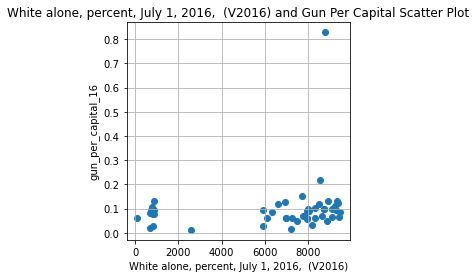

Persons 65 years and over, percent, April 1, 2010


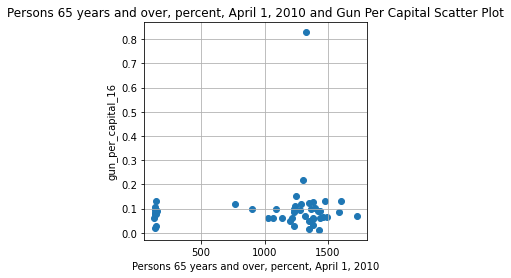

Owner-occupied housing unit rate, 2011-2015


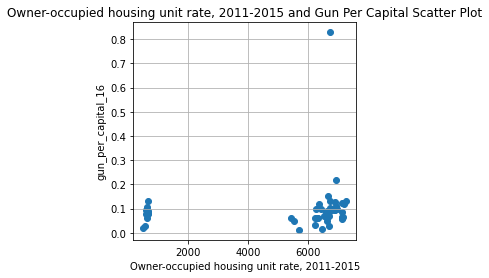

Asian alone, percent, July 1, 2016,  (V2016)


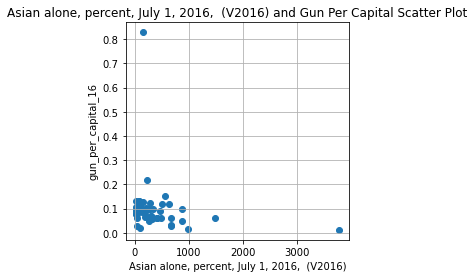

Foreign born persons, percent, 2011-2015


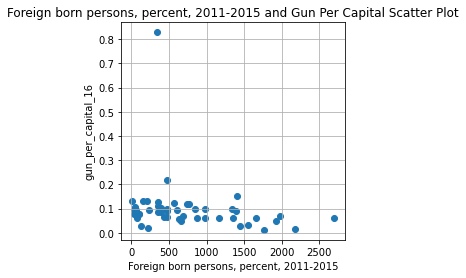

Median gross rent, 2011-2015


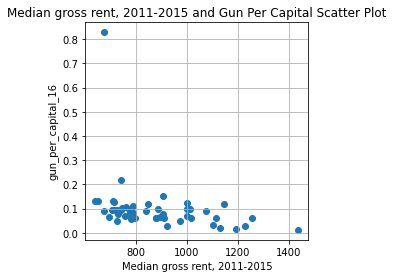

In [61]:
# To create scatter plot for all the New_fact variable in speparate figures.

for columns in six:
    plt.figure(figsize = (4,4))
    print(columns)
    plt.scatter(New_fact[columns], New_fact['gun_per_capital_16'], label = columns)
    plt.title(columns+" and Gun Per Capital Scatter Plot")     
    plt.ylabel("gun_per_capital_16")
    plt.xlabel(columns)
    plt.grid(True)
    plt.show()


#### Solution

From all these analyses, we can make the following inferences:

* Kentucky have the highest number of gun per capital among all the states both in the year 2010 and 2016.
* The top 10 states as regards highest gun per capital in the year 2010 are: Kentucky, Utah, Montana, Alaska, West Virginia, Wyoming, South Dakota, North Dakota, Arkansas, and Tennessee.
* The top 10 states as regards highest gun per capital in the year 2016 are: Kentucky, Indiana, Illinois, West Virginia, Montana, South Dakota, Alabama, New Hampshire, Alaska, and Minnesota.

* From the scatter plots above, we can also infer the charts with negative and positive associations. From the charts:
    * The relationship between White alone, percent, July 1, 2016, (V2016) and gun_per_capital_16 is a positive association.
    * The relationship between Person 65 years and over, percent, April 1, 2010 and gun_per_capital_16 is a positive association.
    * The relationship between Owner-occupied housing unit rate, 2011-2015 and gun_per_capital_16 is a positive association.
    * The relationship between Asian alone, percent, July 1, 2016, (V2016) and gun_per_capital_16 is a negative association.
    * The relationship between Foreign born persons, percent, 2011-2015 and gun_per_capital_16 is a negative association.
    * The relationship between Median gross rent, 2011-2015 and gun-per_capital_16 is a negative association.


### Which states have had the highest growth in gun registrations?

We will calculate the percentage of increasing gun registrations from 2010 to 2016

In [64]:
# To calculate the percentage increase in gun registrations from 2010 to 2016

Final_data['Gun_increase'] = Final_data['totals_16'] / (Final_data['totals_16'] - Final_data['totals_10'])

In [65]:
# To get the top 10 states by increase in gun registrations

Final_data.nlargest(10, 'Gun_increase')

,state,totals_10,totals_16,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,D,F,FN,NaN,S,X,Z,gun_per_capital_10,gun_per_capital_16,Gun_increase
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092797,0.118140,4.031972
49,Wyoming,47709,63594,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084625,0.108615,4.003399
25,Montana,101095,136337,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102177,0.130776,3.868594
15,Kansas,144156,196548,2907289.0,2853129.0,190.0,2853118.0,670.0,720.0,2460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050526,0.067605,3.751489
3,Arkansas,191448,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065654,0.089020,3.567497
27,Nevada,104789,147992,2940058.0,2700691.0,890.0,2700551.0,630.0,690.0,2300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038801,0.050336,3.425503
30,New Mexico,109069,161216,2081015.0,2059198.0,11.0,2059179.0,62.0,7.0,236.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052967,0.077470,3.091568
47,West Virginia,159550,242350,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086103,0.132352,2.926932
26,Nebraska,58283,88663,1907116.0,1826334.0,440.0,1826341.0,700.0,720.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031913,0.046491,2.918466
33,North Dakota,47083,72036,757952.0,672591.0,127.0,672591.0,73.0,66.0,233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070002,0.095040,2.886867


In [68]:
# To get the largest percentage increase

Final_data['Gun_increase'].max()

# This shows that Alaska has a percentage increase of 403.197%...the highest percentage increase in gun registrations

4.031971662526451

#### Solution

The top 10 states with the highest gun registration from 2010 to 2016 are: Alaska, Wyoming, Montana, Kansas, Arkansas, Nevada, New Mexico, West Virginia, Nebraska, and North Dakota.

**The state with the highest increase in gun registrations is Alaska with percentage increase of 403.197%.**

### What is the overall trends of gun purchases?

To solve this question, we will be creating line chart for gun purchase from 2010 to 2016. This will help us in observing the overall trend.

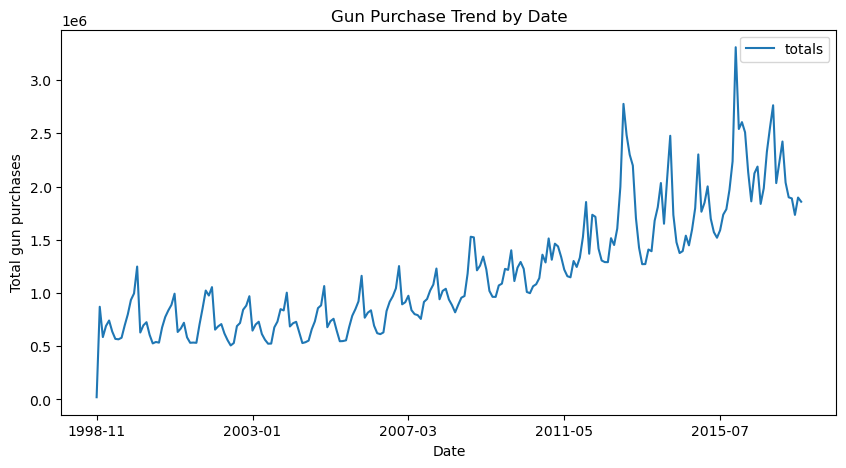

In [86]:
# To create line chart and group by date

#Assign figure size
plt.figure(figsize = (10, 5))

df_2.groupby('month')['totals'].sum().plot(kind = 'line', sharex = True, sharey = True, layout = (2, 1))
#set x and y axis lable name
plt.xlabel('Date')
plt.ylabel('Total gun purchases')
plt.legend()
plt.title("Gun Purchase Trend by Date")
plt.show()

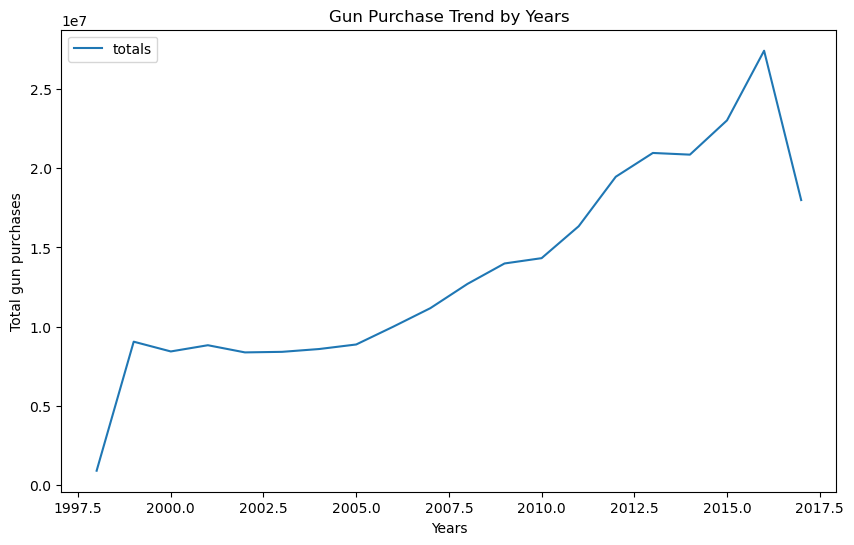

In [85]:
# To create line chart and group by year

plt.figure(figsize = (10, 6))
df_2.groupby('Year')['totals'].sum().plot(kind = 'line')

plt.ylabel('Total gun purchases')
plt.xlabel('Years')
plt.title("Gun Purchase Trend by Years")
plt.legend()
plt.show()

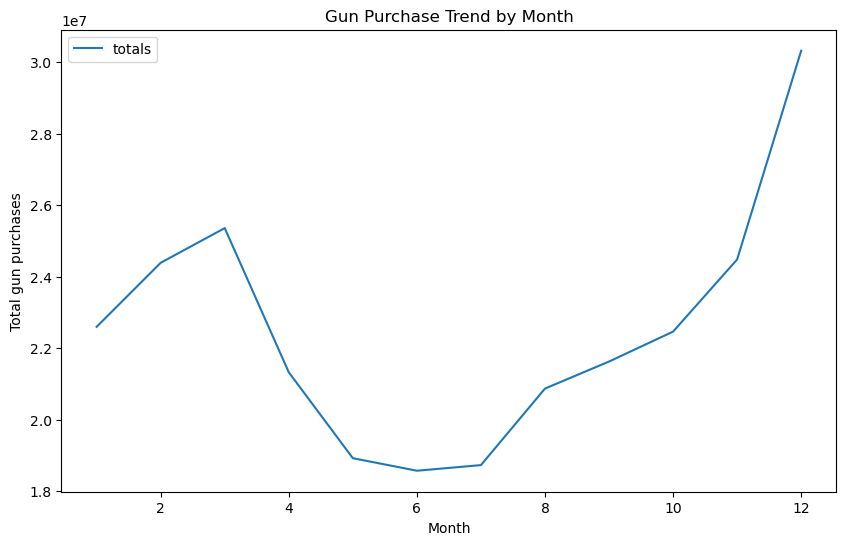

In [84]:
# To create line chart and group by month

plt.figure(figsize = (10,6))
df_2.groupby('Month Number')['totals'].sum().plot(kind ='line')

plt.ylabel('Total gun purchases')
plt.xlabel('Month')
plt.title("Gun Purchase Trend by Month")
plt.legend()
plt.show()

#### Solution

From the visuals above, we can make the following inferences:

* There is an increase in gun purchases from 1998 to 2016 then a sudden reduction in gun purchases towards 2017.
* From the gun purchases trend by date column, we can see that there is increase in gun purchases every month per year.
* We can also notice a relatively stable gun purchased from 2000 to 2005.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

**Question 1: What census data is most associated with high gun per capital? - Kentucky have the highest number of gun per capital among all the states both in the year 2010 and 2016.**

* The top 10 states as regards highest gun per capital in the year 2010 are: Kentucky, Utah, Montana, Alaska, West Virginia, Wyoming, South Dakota, North Dakota, Arkansas, and Tennessee.
* The top 10 states as regards highest gun per capital in the year 2016 are: Kentucky, Indiana, Illinois, West Virginia, Montana, South Dakota, Alabama, New Hampshire, Alaska, and Minnesota.

* From the scatter plots above, we can also infer the charts with negative and positive associations. From the charts:
    * The relationship between White alone, percent, July 1, 2016, (V2016) and gun_per_capital_16 is a positive association.
    * The relationship between Person 65 years and over, percent, April 1, 2010 and gun_per_capital_16 is a positive association.
    * The relationship between Owner-occupied housing unit rate, 2011-2015 and gun_per_capital_16 is a positive association.
    * The relationship between Asian alone, percent, July 1, 2016, (V2016) and gun_per_capital_16 is a negative association.
    * The relationship between Foreign born persons, percent, 2011-2015 and gun_per_capital_16 is a negative association.
    * The relationship between Median gross rent, 2011-2015 and gun-per_capital_16 is a negative association.


**Question 2: Which states have had the highest growth in gun registrations? - The top 10 states with the highest gun registration from 2010 to 2016 are: Alaska, Wyoming, Montana, Kansas, Arkansas, Nevada, New Mexico, West Virginia, Nebraska, and North Dakota.**

**The state with the highest increase in gun registrations is Alaska with percentage increase of 403.197%.**


**Question 3: What is the overall trend of gun purchases? -**

* There is an increase in gun purchases from 1998 to 2016 then a sudden reduction in gun purchases towards 2017.
* From the gun purchases trend by date column, we can see that there is increase in gun purchases every month per year.
* We can also notice a relatively stable gun purchased from 2000 to 2005.

### References

* https://www.stackvidhya.com/pandas-change-column-type/#:~:text=You%20can%20change%20the%20column,used%20for%20modeling%20and%20classification.

* https://www.stackvidhya.com/drop-column-in-pandas/#:~:text=During%20the%20data%20analysis%20operation,%2C%20inplace%3DTrue)%20statement.

* https://stackoverflow.com/questions/39238057/typeerror-argument-of-type-float-is-not-iterable
